In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Step 1: Load a Dataset **

A dataset is nothing but a collection of data. A dataset generally has two main components: 
1.Features: also known as predictors, inputs, or attributes
2.also known as the target, label, or output

In [2]:
import pandas as pd
import numpy as np


In [1]:
# load the iris dataset as an example 
from sklearn.datasets import load_iris 
iris= load_iris() 
iris.keys()

dict_keys=(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

ModuleNotFoundError: No module named 'sklearn'

# ****Converting the dataset to pandas dataframe****

In [4]:
 
iris= pd.DataFrame(
    data = np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )
 

In [5]:
iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


The iris data frame contains the length and width of sepals and petals including the target column which is the numerical representation of classes of Iris flowers that we need to classify (eg: Setosa(0), Versicolor(1),  Virginica(2) ).

Since there is no column of names of species in the data frame let's add one more column with names of different species corresponding to their numerical values. It really helps us to access the different classes using their names instead of numbers.

In [6]:
 species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species

iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


This code will create another column in the data frame with names of different species.

In [7]:
iris.groupby('species').size()

 

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [8]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# ****# Plotting the dataset****

Plotting a dataset is a great way to explore its distribution. Plotting the iris dataset can be done using matplotlib, a Python library for 2D plotting.



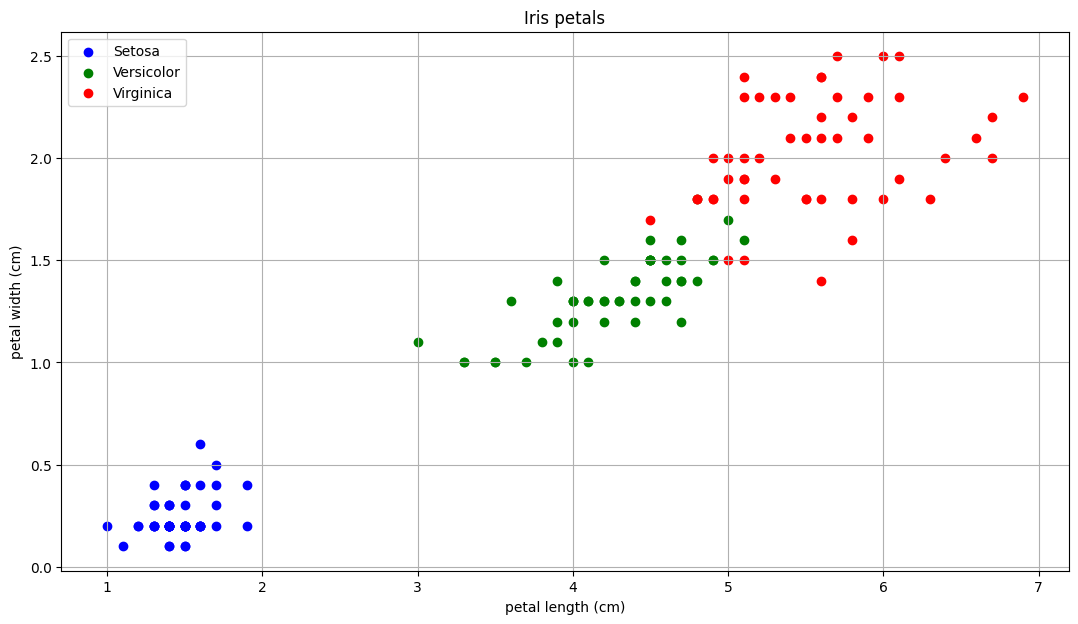

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

/tmp/ipykernel_18/1773764465.py:6: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version o

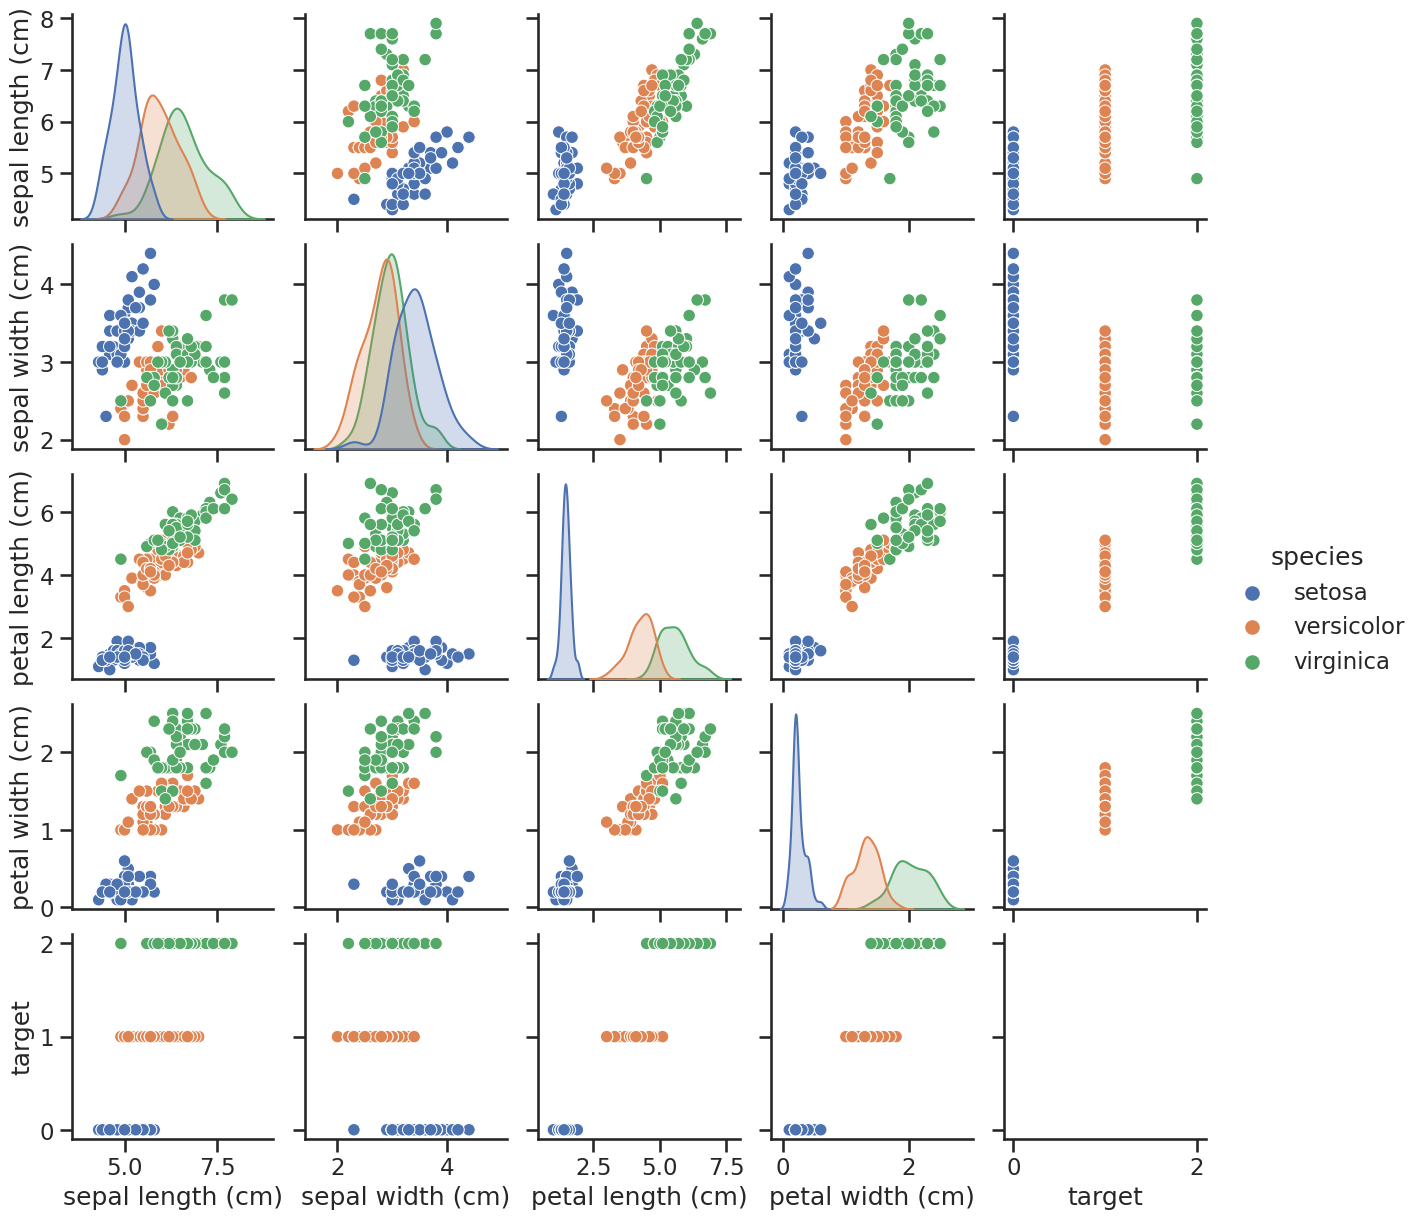

In [10]:
import seaborn as sns
# Visualize the whole dataset
# Set use_inf_as_na option to True

# Set the use_inf_as_na option to True
with pd.option_context("mode.use_inf_as_na", True):
    sns.set(style="ticks", context="talk")

# Create a pair plot
sns.pairplot(data=iris, hue='species')
plt.show()

#  ** Performing classification**

In [11]:
from sklearn.model_selection import train_test_split

# Droping the target and species since we only need the measurements
X = iris.drop(['target','species'], axis=1)

# converting into numpy array and assigning petal length and petal width
X = X.to_numpy()[:, (2,3)]
y = iris['target']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [13]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

# Training predictions

In [14]:
training_prediction = log_reg.predict(X_train)
training_prediction

array([1., 2., 1., 0., 1., 2., 0., 0., 1., 2., 0., 2., 0., 0., 2., 1., 2.,
       2., 2., 2., 1., 0., 0., 1., 2., 0., 0., 0., 1., 2., 0., 2., 2., 0.,
       1., 1., 2., 1., 2., 0., 2., 1., 2., 1., 1., 1., 0., 1., 1., 0., 1.,
       2., 2., 0., 1., 2., 2., 0., 2., 0., 1., 2., 2., 1., 2., 1., 1., 2.,
       2., 0., 1., 1., 0., 1., 2.])

# Test predictions

In [15]:
test_prediction = log_reg.predict(X_test)
test_prediction

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
       0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0., 1., 2., 2., 1., 2., 1.,
       2., 1., 0., 2., 1., 0., 0., 0., 1., 2., 0., 0., 0., 1., 0., 1., 2.,
       0., 1., 2., 0., 2., 2., 1.])

In [16]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_prediction)

1.0

# Support vector machine algorithm

In [17]:
# Predict from the test dataset
predictions = svn.predict(X_test)
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9866666666666667

In [18]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        29
         1.0       0.96      1.00      0.98        23
         2.0       1.00      0.96      0.98        23

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



# Performance Measures

Performance measures are used to evaluate the effectiveness of classifiers on different datasets with different characteristics. For classification problems, there are three main measures for evaluating the model, the precision(the accuracy of positive predictions or the number of most relevant values from retrieved values.), Recall(ratio of positive instances that are truly detected by the classifier), and **confusion matrix**.

# Performance in training

In [19]:
from sklearn import metrics

print("Precision, Recall, Confusion matrix, in training\n")

# Precision Recall scores
print(metrics.classification_report(y_train, training_prediction, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_train, training_prediction))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        21
         1.0      0.923     0.889     0.906        27
         2.0      0.893     0.926     0.909        27

    accuracy                          0.933        75
   macro avg      0.939     0.938     0.938        75
weighted avg      0.934     0.933     0.933        75

[[21  0  0]
 [ 0 24  3]
 [ 0  2 25]]


Better way to evaluate the performance of a classifier is to look at the confusion matrix. The main usage of the confusion matrix is to identify how many of the classes are misclassified by the classifier.


# Performance in testing

In [20]:
print("Precision, Recall, Confusion matrix, in testing\n")

# Precision Recall scores
print(metrics.classification_report(y_test, test_prediction, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_test, test_prediction))


Precision, Recall, Confusion matrix, in testing

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        29
         1.0      1.000     1.000     1.000        23
         2.0      1.000     1.000     1.000        23

    accuracy                          1.000        75
   macro avg      1.000     1.000     1.000        75
weighted avg      1.000     1.000     1.000        75

[[29  0  0]
 [ 0 23  0]
 [ 0  0 23]]
